In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta
from netCDF4 import Dataset
import numpy as np
import os
import pandas as pd

# === Fire shapefile ===
fire_path = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\Order_CD850U\mga94_54\esrishape\cma100\East Gippsland-0\FIRE\FIRE_HISTORY_ORIGIN.shp"
gdf = gpd.read_file(fire_path)
gdf = gdf.to_crs(epsg=4326)  # convert to lat/lon

# === Filter fires between Dec 2019 and Jan 2020 ===
gdf['FIRE_START'] = pd.to_datetime(gdf['FIRE_START'], errors='coerce')
filtered_fires = gdf[
    (gdf['FIRE_START'] >= '2019-12-25') & 
    (gdf['FIRE_START'] <= '2020-01-05')
]

In [2]:
# Filter for fires on December 25, 2019
fires_on_25th = filtered_fires[filtered_fires['FIRE_START'].dt.date == datetime(2019, 12, 25).date()]

# Get coordinates
for idx, row in fires_on_25th.iterrows():
    lon, lat = row.geometry.x, row.geometry.y
    print(f"🔥 {row['FIRE_NAME']} at (lon: {lon:.4f}, lat: {lat:.4f})")


🔥 SNOWY 8 - WALLAGARAUGH - WALLAGARAUGH ROAD at (lon: 149.6970, lat: -37.4616)


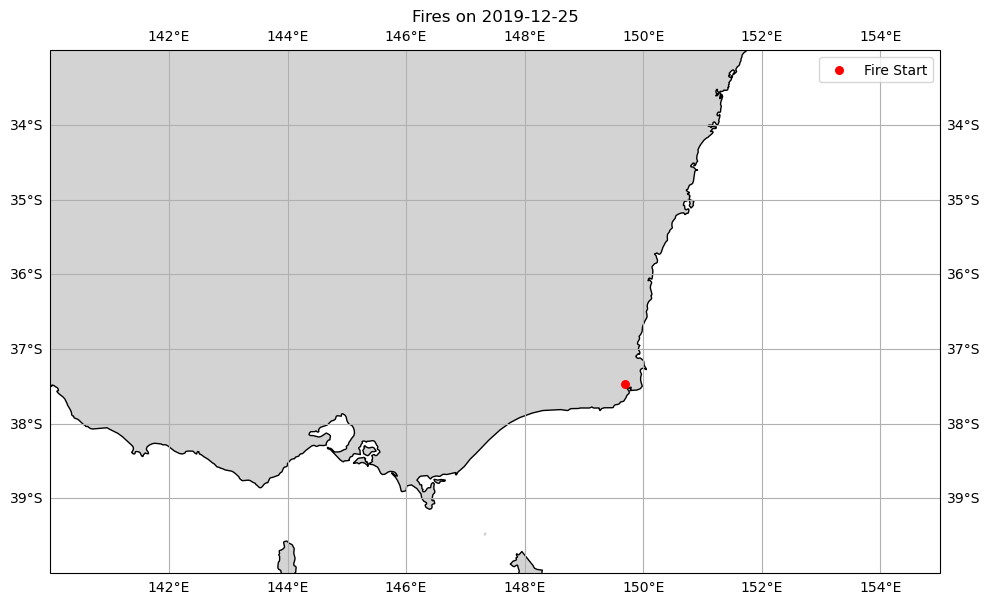

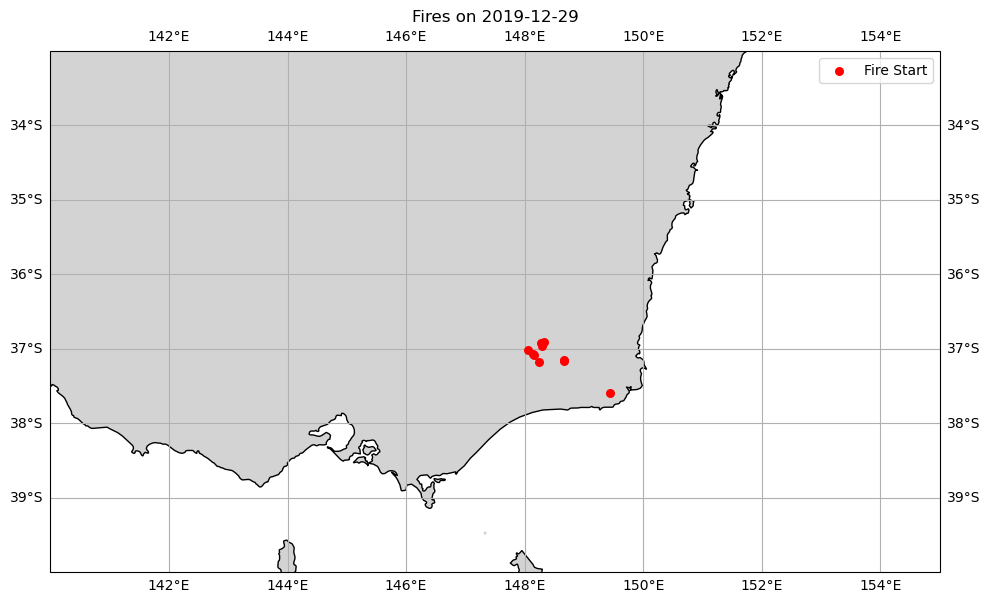

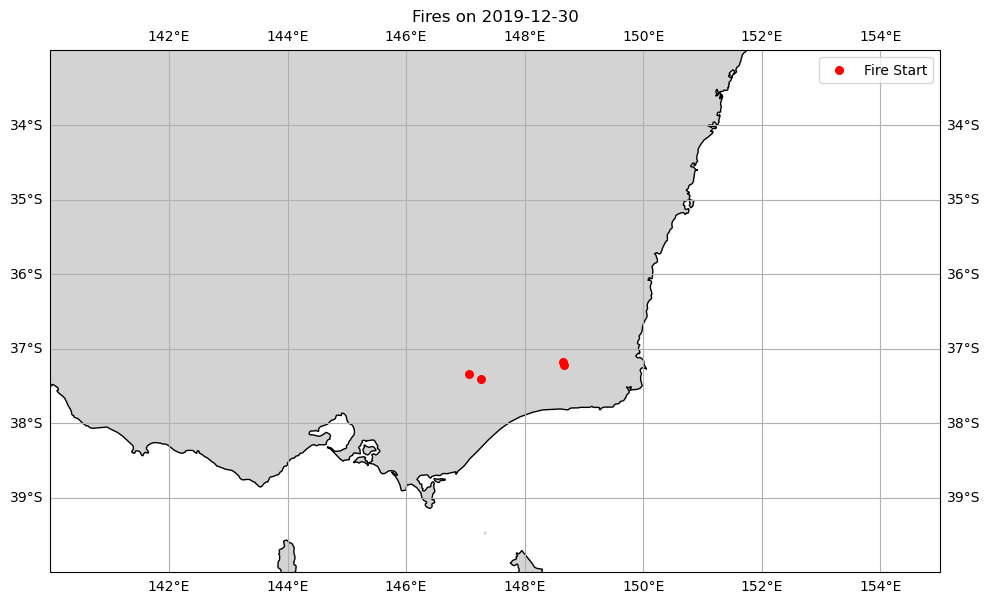

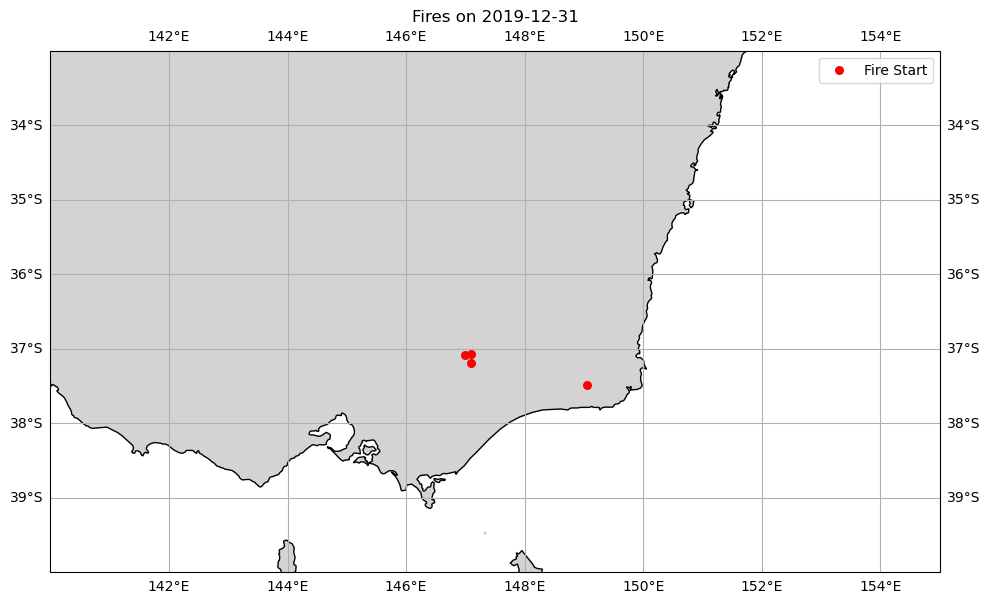

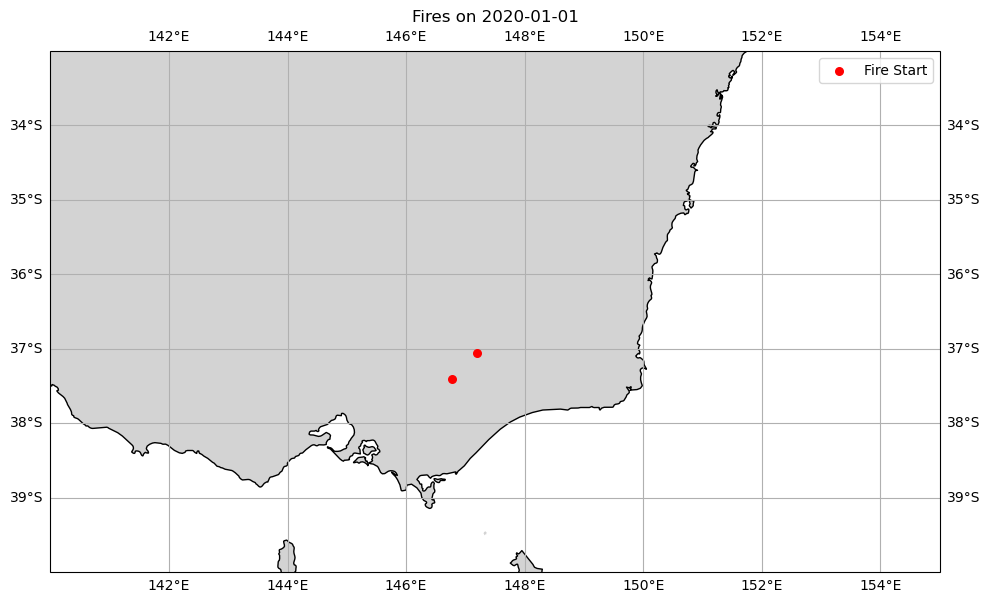

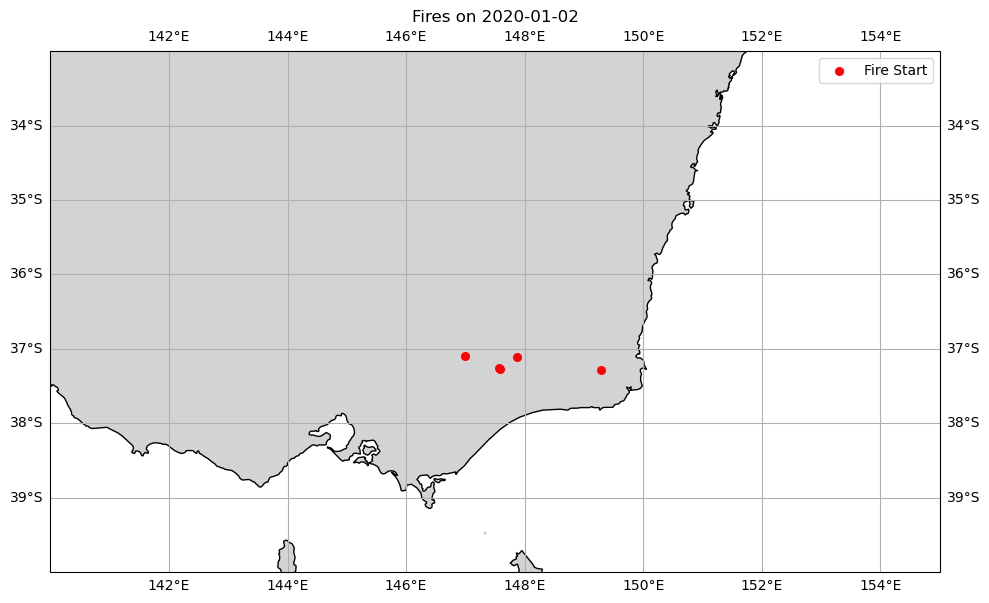

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta

# === Load shapefile and convert to lat/lon ===
fire_path = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\Order_CD850U\mga94_54\esrishape\cma100\East Gippsland-0\FIRE\FIRE_HISTORY_ORIGIN.shp"
gdf = gpd.read_file(fire_path)
gdf = gdf.to_crs(epsg=4326)

# === Parse fire start times ===
gdf['FIRE_START'] = pd.to_datetime(gdf['FIRE_START'], errors='coerce')

# === Filter relevant dates ===
start_date = datetime(2019, 12, 25)
end_date = datetime(2020, 1, 5)

# === Loop through each day ===
current_date = start_date
while current_date <= end_date:
    fires_today = gdf[gdf['FIRE_START'].dt.date == current_date.date()]
    
    if not fires_today.empty:
        fig = plt.figure(figsize=(10, 8))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([140, 155, -40, -33])  # Adjust as needed for Victoria / East Gippsland
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND, facecolor='lightgray')
        ax.gridlines(draw_labels=True)

        fires_today.plot(ax=ax, color='red', markersize=30, label='Fire Start', zorder=5)
        plt.title(f"Fires on {current_date.strftime('%Y-%m-%d')}")
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    current_date += timedelta(days=1)
